In [1]:
import pandas as pd
from datetime import datetime, date
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

# This function converts given date to age
def age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) <
                                     (born.month, born.day))

## Import and preprocess demographics data

In [2]:
path = r'' # Specify the file path

df_raw = pd.read_csv(path, index_col=None)

df = (df_raw.rename(
    columns={
        'Your OpenHumans OpenAPS Data Commons "project member ID"':
        'id',
        'When were you diagnosed with diabetes?':
        'diagnosedDate',
        'When did you first go on an insulin pump?':
        'pumpUse',
        'When did you first go on a continuous glucose monitor (CGM)?':
        'CGMUse',
        'When did you first start using a DIY closed loop?':
        'closedLoopUse',
        'What type of DIY close loop technology do you use? Select all that you actively use:':
        'DIYTech',
        'When were you born?':
        'DoB',
        'What country do you live in?':
        'country',
        'Do you yourself have diabetes, or are you filling out this form for a child/loved one who has diabetes?':
        'patient_carer',
        'How much do you weigh?':
        'weight',
        'How tall are you?':
        'height',
        'How many units of insulin do you take per day?':
        'dailyInsulinUnits',
        'How many units of basal insulin do you take per day, on average?':
        'dailyBasalInsulinUnits',
        'On average, how many grams of carbohydrates do you eat in a day?':
        'dailyCarbs',
        'What was your last lab-reported A1C?':
        'lastA1C',
        'When was your last lab-reported A1C?':
        'lastA1Cdate',
        'Ethnicity origin:':
        'ethinicity',
        'Gender':
        'gender',
    }))

#df.index = pd.to_datetime(df_raw["Timestamp"], format='%m/%d/%Y %H:%M:%S')

df.head(2)

,Timestamp,id,diagnosedDate,pumpUse,CGMUse,closedLoopUse,DIYTech,DoB,country,patient_carer,weight,height,dailyInsulinUnits,dailyBasalInsulinUnits,dailyCarbs,lastA1C,lastA1Cdate,ethinicity,gender
0,1/26/2017 19:22:07,84984656,30/03/2015,01/06/2015,01/05/2015,22/09/2016,"A ""traditional"" OpenAPS rig using the oref0 al...",18/09/2002,USA,I am a parent/caregiver of a child with Type 1...,115.0,"5'5""",26.25,15.275,65.0,5.7,17/11/2017,White,NaN
1,1/26/2017 19:35:44,41663654,28/07/2017,27/01/2021,01/01/2021,01/01/2016,"A ""traditional"" OpenAPS rig using the oref0 al...",NaN,UK,I myself have Type 1 diabetes,210.0,5'10,40.00,16.000,130.0,7.5,17/07/2017,White,NaN


## Demographic Feature Analysis

In [3]:
df.count() # total records

Timestamp                 229
id                        229
diagnosedDate             229
pumpUse                   205
CGMUse                    210
closedLoopUse             201
DIYTech                   210
DoB                       217
country                   221
patient_carer             229
weight                    208
height                    205
dailyInsulinUnits         196
dailyBasalInsulinUnits    201
dailyCarbs                193
lastA1C                   203
lastA1Cdate               202
ethinicity                223
gender                    161
dtype: int64

In [4]:
df.isnull().sum() # missing records

Timestamp                  0
id                         0
diagnosedDate              0
pumpUse                   24
CGMUse                    19
closedLoopUse             28
DIYTech                   19
DoB                       12
country                    8
patient_carer              0
weight                    21
height                    24
dailyInsulinUnits         33
dailyBasalInsulinUnits    28
dailyCarbs                36
lastA1C                   26
lastA1Cdate               27
ethinicity                 6
gender                    68
dtype: int64

In [5]:
# OpenAPS data doners

df['patient_carer'].value_counts()

I myself have Type 1 diabetes                                                            179
I am a parent/caregiver of a child with Type 1 diabetes                                   33
I am a spouse/partner of an adult with Type 1 diabetes                                     5
I am the brother of a person with Type 1 diabetes                                          1
researcher                                                                                 1
I am a biomedical engineering student interested in the project for academic purposes      1
I'm pre diabetic                                                                           1
Researcher                                                                                 1
I work in anti aging and diabetes research and track my own data                           1
family member                                                                              1
I am a Researcher, I want to works towards making Insulin Infusion bet

In [6]:
df['DIYTech'].value_counts()

A "traditional" OpenAPS rig using the oref0 algorithm (i.e. using a Raspberry Pi/Carelink; or an Edison/Explorer Board; etc.)                                                                             86
AndroidAPS                                                                                                                                                                                                73
Loopkit/Loop                                                                                                                                                                                              18
A "traditional" OpenAPS rig using the oref0 algorithm (i.e. using a Raspberry Pi/Carelink; or an Edison/Explorer Board; etc.), Loopkit/Loop                                                               17
A "traditional" OpenAPS rig using the oref0 algorithm (i.e. using a Raspberry Pi/Carelink; or an Edison/Explorer Board; etc.), AndroidAPS                                           

## Age statistics of patients

In [7]:
df['DoB'] = pd.to_datetime(df["DoB"], format='%d/%m/%Y')

df['age'] = df['DoB'].apply(age)
  
age_qtiles = df['age'].quantile([.25, .5, .75]).to_list()

print('The average age of patients is {:.0f} years.'.format(df['age'].mean()))
print('The median age of patients is {:.0f} years.'.format(age_qtiles[1]))
print('25% of patients are younger than {:.0f} years.'.format(age_qtiles[0]))
print('25% of patients are older than {:.0f} years.'.format(age_qtiles[2]))

The average age of patients is 37 years.
The median age of patients is 37 years.
25% of patients are younger than 28 years.
25% of patients are older than 48 years.


## Gender statistics

In [8]:
df['gender'].value_counts()

Male                114
Female               46
Transgender Male      1
Name: gender, dtype: int64

In [9]:
df.loc[df.gender == 'Male', 'country'].value_counts()

Germany               27
USA                   22
UK                    14
Australia              7
Spain                  5
Canada                 4
Finland                3
Netherlands            3
New Zealand            2
France                 2
Sweden                 2
Norway                 2
Wales                  1
Slovenia               1
China                  1
Luxembourg             1
Korea                  1
Deutschland            1
Dominican Republic     1
UAE                    1
Italy                  1
Switzerland            1
Ukraine                1
Austria                1
Israel                 1
Brazil                 1
Greece                 1
Ireland                1
Northern Ireland       1
India                  1
South Africa           1
Name: country, dtype: int64

In [10]:
df.loc[df.gender == 'Female', 'country'].value_counts()

USA            19
Germany         6
UK              5
Australia       4
Italy           2
US              2
Romania         2
New Zealand     1
Switzerland     1
Canada          1
Ireland         1
Lithuania       1
Hungary         1
Name: country, dtype: int64

## Insulin Intake statistics

In [11]:
insulin_units_male = df.loc[df.gender == 'Male', 'dailyInsulinUnits']

male_insulin_qtiles = insulin_units_male.quantile([.25, .5, .75]).to_list()

print('The average units of insulin intake by males is {:.2f} units.'.format(
    insulin_units_male.mean()))

print('The median male insulin usage is {:.2f} units.'.format(
    male_insulin_qtiles[1]))

print('25% of males insulin intake is less than {:.2f} units.'.format(
    male_insulin_qtiles[0]))

print('25% of males insulin intake is more than {:.2f} units.'.format(
    male_insulin_qtiles[2]))

The average units of insulin intake by males is 45.58 units.
The median male insulin usage is 40.00 units.
25% of males insulin intake is less than 33.09 units.
25% of males insulin intake is more than 53.50 units.


In [12]:
insulin_units_female = df.loc[df.gender == 'Female', 'dailyInsulinUnits']

female_insulin_qtiles = insulin_units_female.quantile([.25, .5, .75]).to_list()

print('The average units of insulin intake by females is {:.2f} units.'.format(
    insulin_units_female.mean()))

print('The median female insulin usage is {:.2f} units.'.format(
    female_insulin_qtiles[1]))

print('25% of females insulin intake is less than {:.2f} units.'.format(
    female_insulin_qtiles[0]))

print('25% of females insulin intake is more than {:.2f} units.'.format(
    female_insulin_qtiles[2]))

The average units of insulin intake by females is 49.06 units.
The median female insulin usage is 36.85 units.
25% of females insulin intake is less than 33.98 units.
25% of females insulin intake is more than 51.33 units.


## Feature correlations and distributions

In [13]:
df["height"] = df["height"].replace(regex={r'"': '', "'": '.', ' ': ''})
df["height"] = pd.to_numeric(df["height"]) # in feet
df["height"] = pd.to_numeric(df["height"]) * 30.48 # in inches

In [18]:
dfcorr = df[[
    'age', 'height', 'weight', 'dailyCarbs', 'dailyInsulinUnits',
    'dailyBasalInsulinUnits'
]]
sns.set(rc={'figure.figsize': (9.7, 5.27)})
dfcorr = dfcorr.dropna(axis=0)
dfcorr.isnull().sum()

sns.set(font_scale=1.4)
ax = sns.heatmap(dfcorr.corr(), annot=True, fmt=".2f", cmap="YlGnBu")
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize=18)
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize=18)
ax.tick_params(axis='x', rotation=90)

In [15]:
df1 = df[[
    'age', 'height', 'weight', 'dailyCarbs', 'dailyInsulinUnits',
    'dailyBasalInsulinUnits'
]]

df1.columns = [''] * len(df1.columns)

x = df1.values  #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df1 = pd.DataFrame(x_scaled)

df1.columns = ['age', 'height', 'weight', 'dailyCarbs', 'dailyInsulinUnits',
    'dailyBasalInsulinUnits']

extracted_col = df["gender"]

df1.insert(1, "gender", extracted_col)

df = df1 

female_age = df.loc[df.gender == 'Female', 'age']
female_height = df.loc[df.gender == 'Female', 'height']
female_weight = df.loc[df.gender == 'Female', 'weight']
female_carbs = df.loc[df.gender == 'Female', 'dailyCarbs']
female_basals = df.loc[df.gender == 'Female', 'dailyBasalInsulinUnits']
insulin_units_female = df.loc[df.gender == 'Female', 'dailyInsulinUnits']

male_age = df.loc[df.gender == 'Male', 'age']
male_height = df.loc[df.gender == 'Male', 'height']
male_weight = df.loc[df.gender == 'Male', 'weight']
male_carbs = df.loc[df.gender == 'Male', 'dailyCarbs']
male_basals = df.loc[df.gender == 'Male', 'dailyBasalInsulinUnits']
insulin_units_male = df.loc[df.gender == 'Male', 'dailyInsulinUnits']

<AxesSubplot:>

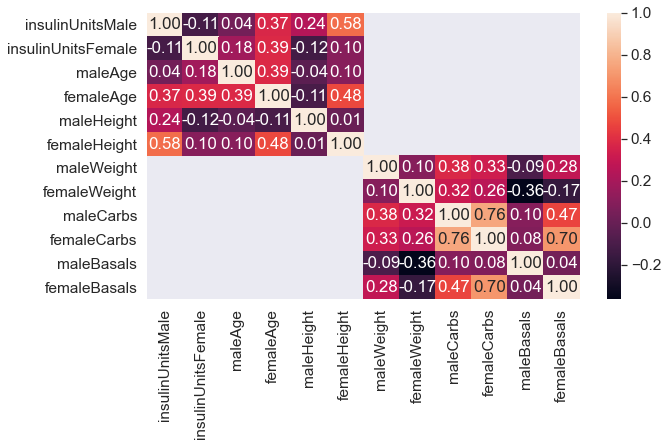

In [16]:
# feature correlations with respect to sex

df1 = pd.concat([
    insulin_units_male, male_age, male_height, male_weight, male_carbs,
    male_basals, insulin_units_female, female_age, female_height,
    female_weight, female_carbs, female_basals], axis=1).head(122)

df1.columns = [
    'insulinUnitsMale', 'insulinUnitsFemale', 'maleAge', 'femaleAge',
    'maleHeight', 'femaleHeight', 'maleWeight', 'femaleWeight', 'maleCarbs',
    'femaleCarbs', 'maleBasals', 'femaleBasals']

sns.heatmap(df1.corr(), annot=True, fmt=".2f")

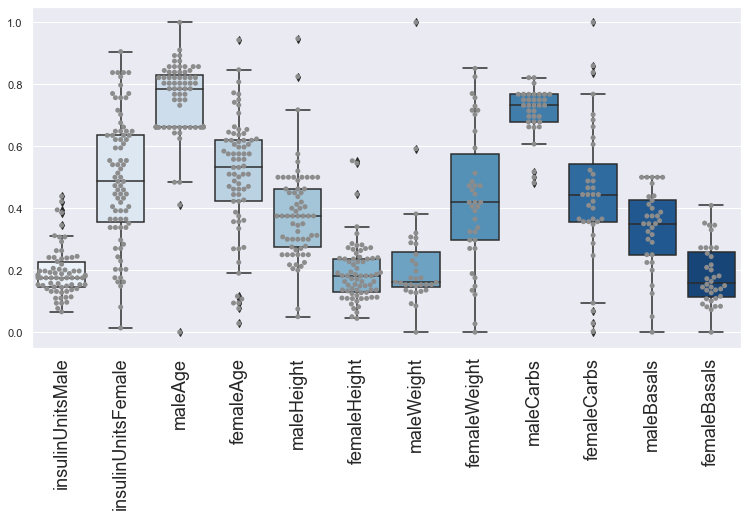

In [17]:
# distributions and anomalies in insulin intake
sns.set(rc={'figure.figsize':(12.7,6.27)})
ax = sns.swarmplot(data=df1, color=".55")
ax = sns.boxplot(data=df1, palette="Blues")

ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)

ax.tick_params(axis='x', rotation=90)